# First Configuration

## Configuration

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np

# Path to the image directory
image_dir = "food-101/images"

# List of classes (folders inside images/)
classes = os.listdir(image_dir)

# Select specific classes (here we are taking the first 3 classes)
classes_to_use = classes[:3]  

2025-02-25 07:57:02.269114: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-25 07:57:02.269201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-25 07:57:02.269253: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 07:57:03.828740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Image visualisation

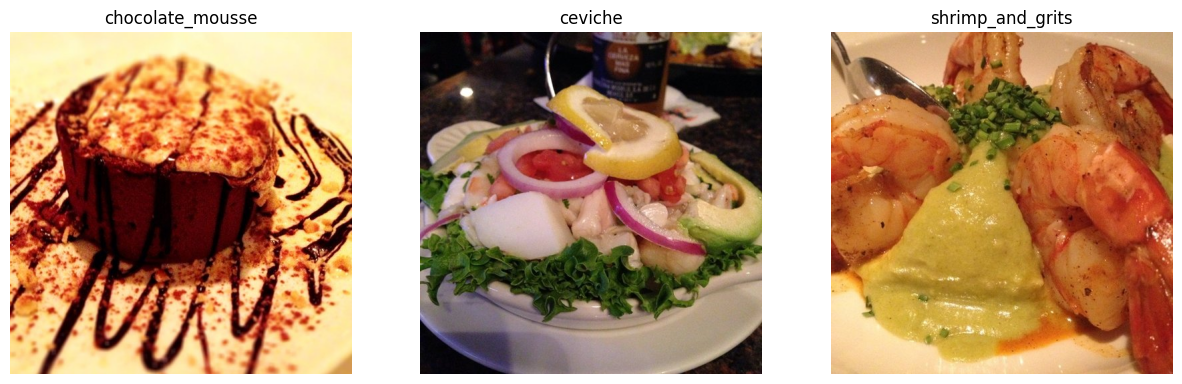

In [2]:
# Display images from the selected classes
random_images = []
for class_name in classes_to_use:
    class_path = os.path.join(image_dir, class_name)
    image_name = random.choice(os.listdir(class_path))  # Choose a random image from the class
    image_path = os.path.join(class_path, image_name)
    random_images.append((image_path, class_name))  # Store the path and class name

# Show images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (img_path, label) in zip(axes, random_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.show()


## Data Augmentation & Data Generators

In [3]:
# Parameters
img_size = (128, 128)  # Image size
batch_size = 64  # Number of images per batch
train_dir = "food-101/images"  # Directory containing images

# Image generator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization (0-1)
    validation_split=0.2,  # 20% of images for validation
    horizontal_flip=True,
    rotation_range=20
)

# Load images only from the selected classes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=classes_to_use  # Load only the selected classes
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=classes_to_use  # Load only the selected classes
)


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## Model Definition

In [4]:
# Define the model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    # Block 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    # Block 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    # Fully Connected Layer
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(classes_to_use), activation="softmax")  # Number of classes
])

## Compilation

In [5]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

## Training

In [6]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)


Epoch 1/30
38/38 [==============================] - 353s 9s/step - loss: 1.0817 - accuracy: 0.4579 - val_loss: 0.9521 - val_accuracy: 0.5167
Epoch 2/30
38/38 [==============================] - 153s 4s/step - loss: 0.9224 - accuracy: 0.5458 - val_loss: 0.9072 - val_accuracy: 0.5717
Epoch 3/30
38/38 [==============================] - 26s 693ms/step - loss: 0.8864 - accuracy: 0.5850 - val_loss: 0.8306 - val_accuracy: 0.6317
Epoch 4/30
38/38 [==============================] - 26s 687ms/step - loss: 0.8054 - accuracy: 0.6417 - val_loss: 0.7787 - val_accuracy: 0.6750
Epoch 5/30
38/38 [==============================] - 26s 690ms/step - loss: 0.7836 - accuracy: 0.6454 - val_loss: 0.7683 - val_accuracy: 0.6533
Epoch 6/30
38/38 [==============================] - 26s 689ms/step - loss: 0.7164 - accuracy: 0.6854 - val_loss: 0.7239 - val_accuracy: 0.7017
Epoch 7/30
38/38 [==============================] - 25s 665ms/step - loss: 0.7112 - accuracy: 0.6808 - val_loss: 0.7448 - val_accuracy: 0.6783
Epo

## Evaluation

In [7]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


10/10 [==============================] - 5s 442ms/step - loss: 0.7432 - accuracy: 0.7200
Loss: 0.7432, Accuracy: 0.7200


## Plotting

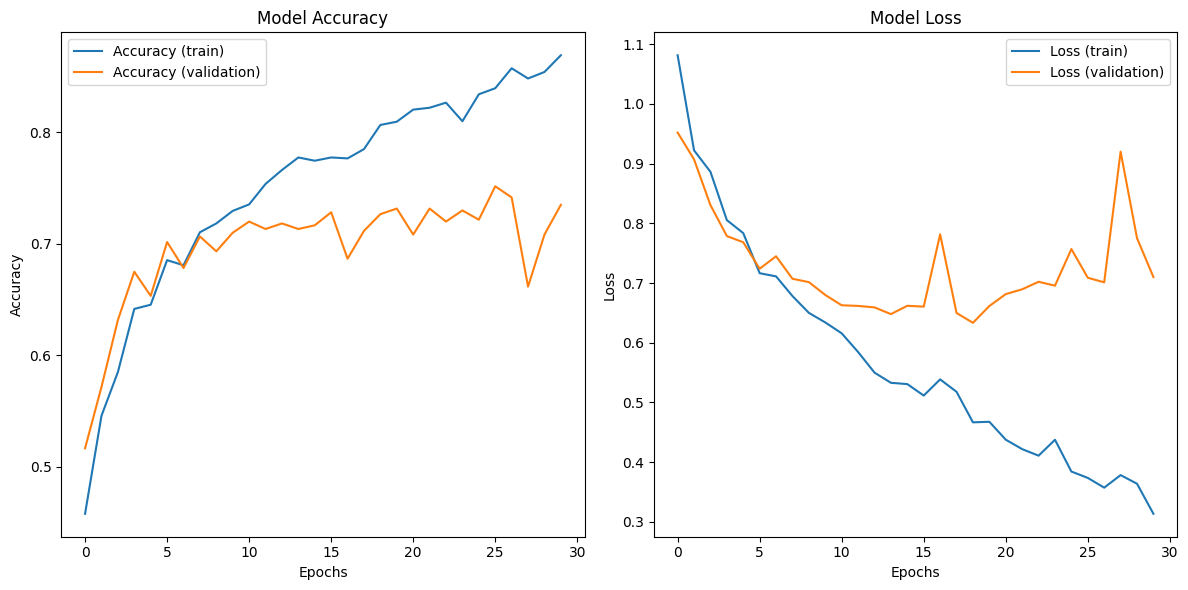

In [8]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from the history object
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy (train)')
plt.plot(val_acc, label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss (train)')
plt.plot(val_loss, label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graphs
plt.tight_layout()
plt.show()


## Classification Report & Confusion Metric

10/10 [==============================] - 4s 416ms/step
Classification Report:
                  precision    recall  f1-score   support

chocolate_mousse     0.3756    0.3850    0.3802       200
         ceviche     0.3213    0.3550    0.3373       200
shrimp_and_grits     0.3966    0.3450    0.3690       200

        accuracy                         0.3617       600
       macro avg     0.3645    0.3617    0.3622       600
    weighted avg     0.3645    0.3617    0.3622       600


Confusion Matrix:


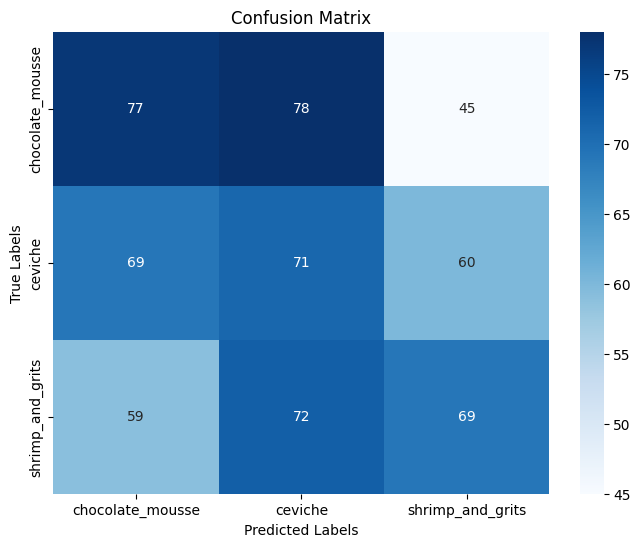

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Get true labels (in categorical format)
y_true = val_generator.classes

# Generate classification report
class_names = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names,
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Second configuration

In [38]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np

# Path to the image directory
image_dir = "food-101/images"

# List of classes (folders inside images/)
classes = os.listdir(image_dir)

# Select specific classes (here we are taking the first 3 classes)
classes_to_use = classes[:3]  

In [39]:
# Parameters
img_size = (224, 224)  # Image size
batch_size = 64  # Number of images per batch
train_dir = "food-101/images"  # Directory containing images

# Image generator for training (with augmentation)
train_datagen =ImageDataGenerator(featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 rotation_range=5,
                 width_shift_range=0.05,
                 height_shift_range=0.05,
                 shear_range=0.2,
                 zoom_range=0.2,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 validation_split=0.2,
                 horizontal_flip=True,
                 vertical_flip=False,
                 rescale=1/255
)

# Load images only from the selected classes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=classes_to_use  # Load only the selected classes
)


val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=classes_to_use  # Load only the selected classes
)


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, padding='Same', activation='relu', input_shape=(128,128,3), kernel_initializer='he_normal'))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters=128, kernel_size=(2,2), padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(2,2), padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters=256, kernel_size=(2,2), padding='Same', activation='relu',kernel_initializer='he_normal'))
model.add(GlobalAveragePooling2D())  

model.add(Dense(512, activation="relu", kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(len(classes_to_use), activation="softmax", kernel_initializer='he_normal', kernel_regularizer=l2(0.001))) 


In [41]:
# Callbacks
checkpointer = ModelCheckpoint(filepath='model.hdf5', verbose=1, save_best_only=True, save_weights_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        2432      
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [42]:
# Train the model
history = model.fit(train_generator,
                              validation_data=val_generator, 
                              epochs=100, 
                              callbacks=[checkpointer, reduceLR, earlystopping
                            ])


Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 1.1824 - accuracy: 0.3308
Epoch 1: val_loss improved from inf to 1.10385, saving model to model.hdf5
38/38 [==============================] - 79s 2s/step - loss: 1.1824 - accuracy: 0.3308 - val_loss: 1.1039 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 1.1031 - accuracy: 0.3133
Epoch 2: val_loss improved from 1.10385 to 1.09954, saving model to model.hdf5
38/38 [==============================] - 74s 2s/step - loss: 1.1031 - accuracy: 0.3133 - val_loss: 1.0995 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 1.0905 - accuracy: 0.3817
Epoch 3: val_loss did not improve from 1.09954
38/38 [==============================] - 69s 2s/step - loss: 1.0905 - accuracy: 0.3817 - val_loss: 1.1018 - val_accuracy: 0.3567 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 1.0884 - accuracy: 

In [43]:
# Evaluation
test_loss, test_acc = model.evaluate(val_generator)
print(f'\nAccuracy val: {test_acc*100:.2f}%')
print(f'\nLoss val: {test_loss*100:.2f}%')


10/10 [==============================] - 9s 911ms/step - loss: 0.5663 - accuracy: 0.7817

Accuracy val: 78.17%

Loss val: 56.63%


In [28]:
from sklearn.metrics import accuracy_score
x_test, y_test = val_generator.next()
y_pred_classes = model.predict(x_test) #return probabilities of each class
y_pred = np.argmax(y_pred_classes,axis=1)
y_label = np.argmax(y_test,axis=1)

print('Accuracy score: {:.1f}%'.format(accuracy_score(y_pred,y_label)*100))

19/19 [==============================] - 1s 48ms/step
Accuracy score: 78.0%


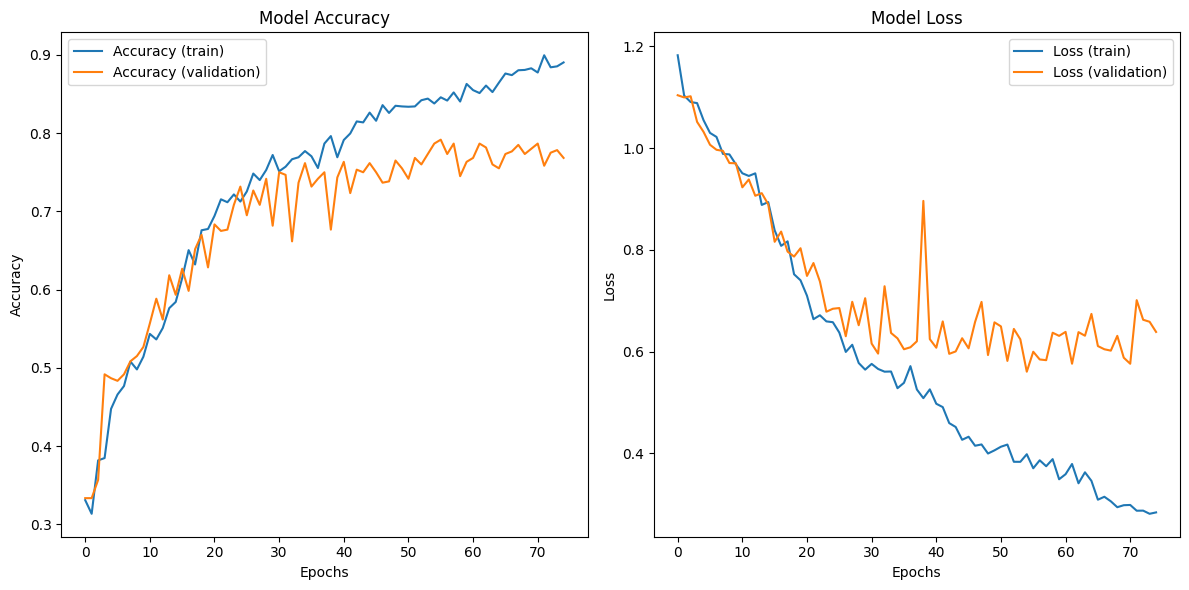

In [44]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from the history object
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy (train)')
plt.plot(val_acc, label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss (train)')
plt.plot(val_loss, label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graphs
plt.tight_layout()
plt.show()


Classification Report:
                  precision    recall  f1-score   support

chocolate_mousse     0.3222    0.4350    0.3702       200
         ceviche     0.3397    0.2650    0.2978       200
shrimp_and_grits     0.2989    0.2600    0.2781       200

        accuracy                         0.3200       600
       macro avg     0.3203    0.3200    0.3153       600
    weighted avg     0.3203    0.3200    0.3153       600


Confusion Matrix:


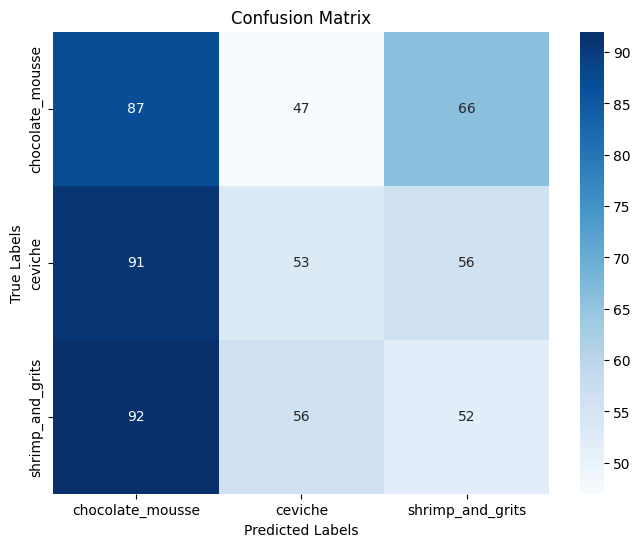

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels (in categorical format)
y_true = val_generator.classes

# Generate classification report
class_names = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()